# Preprocessing- Standarization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('csv/Social_Network_Ads.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
42,15772798,Male,35,108000,0
125,15697020,Female,39,61000,0
316,15667417,Female,54,104000,1
339,15665760,Male,39,122000,1
219,15732987,Male,59,143000,1


In [3]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
x_train


,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


## Standard Scalar

In [7]:
from sklearn.preprocessing import StandardScaler

In [39]:
scalar=StandardScaler()

In [40]:
scalar.fit(x_train)
x_train_scaled=scalar.transform(x_train)
x_test_scaled=scalar.transform(x_test) 
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [11]:
scalar.mean_

array([3.78642857e+01, 6.98071429e+04])

In [13]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

## Effect of Scaling

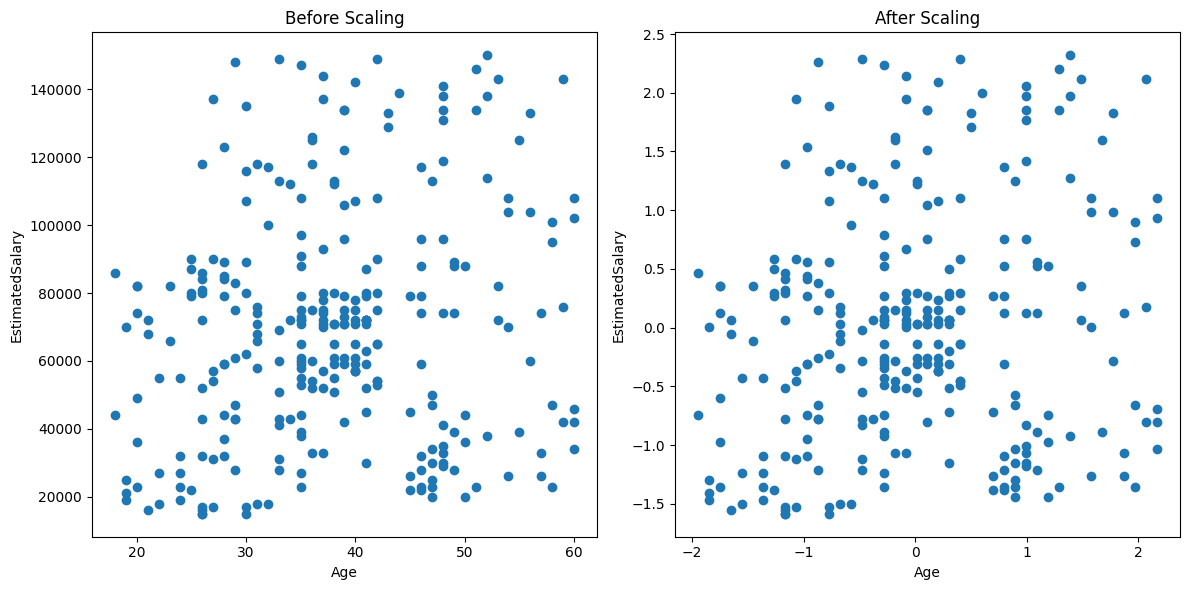

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Before scaling
ax1.scatter(x=x_train['Age'], y=x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax1.set_xlabel("Age")
ax1.set_ylabel("EstimatedSalary")

# After scaling
ax2.scatter(x=x_train_scaled['Age'], y=x_train_scaled['EstimatedSalary'])
ax2.set_title("After Scaling")
ax2.set_xlabel("Age")
ax2.set_ylabel("EstimatedSalary")

plt.tight_layout()
plt.show()

## Why Scaling is Important

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [44]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)
print(y_pred)
print(y_pred_scaled)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 1]
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 1 1 1 0 1 1]


In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print("actual",accuracy_score(y_test,y_pred))
print("actual",accuracy_score(y_test,y_pred_scaled))

actual 0.875
actual 0.8666666666666667
